# Aggregate MAP and NIRS data

Store all data in a csv file. Examine graph to identify erroneous values.

Simo Mäkelä  
Helsinki Metropolia University of Applied Sciences  
4.10.2020

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import zoll
from utils import nirs
from utils import misc
from utils.autoscale import autoscale

In [2]:
# parameters
case_id = 1

In [3]:
case_str = str(case_id).zfill(5)
datafile = 'output/' + case_str + '_2.csv'
amendfile = 'amend/' + case_str + '_a2.csv'

In [4]:
df = pd.read_csv(datafile,
                 sep = ',',
                 na_values = ['-'],
                 parse_dates = ['Time'])
df.drop('id', axis=1, inplace=True)
misc.NormalizeTime(df)
df.set_index('Time', inplace=True)

In [5]:
amend_df = pd.read_csv(amendfile,
                       sep = ';',
                       na_values = ['--'],
                       parse_dates = ['Time'])

amend_df.replace({'Mark': ' ',
                  'Mark': '',
                  'Mark': np.nan}, '0', inplace=True)

In [6]:
df['Mark'] = amend_df['Mark'].array
df['Bad_rSO2_manual'] = amend_df['HuonoSignaali2'].array
df['Bad_MAP_manual'] = amend_df['Bad_MAP_manual'].array

In [7]:
nirs_man_ranges = misc.GetRanges(df, 'Bad_rSO2_manual')
nirs_auto_ranges = misc.GetRanges(df, 'Bad_rSO2_auto')
map_man_ranges = misc.GetRanges(df, 'Bad_MAP_manual')
map_auto_ranges = misc.GetRanges(df, 'Bad_MAP_auto')

In [8]:
mark_timestamp = df.loc[df['Mark'] == 1].index[0]

In [9]:
# save data to csv
df[['MAP', 'Bad_MAP_auto', 'Bad_MAP_manual', 'rSO2', 'Mark', 'Bad_rSO2_auto', 'Bad_rSO2_manual', 'Elapsed']].to_csv('output/' + case_str + '_3.csv', na_rep='-', date_format='%H:%M:%S')

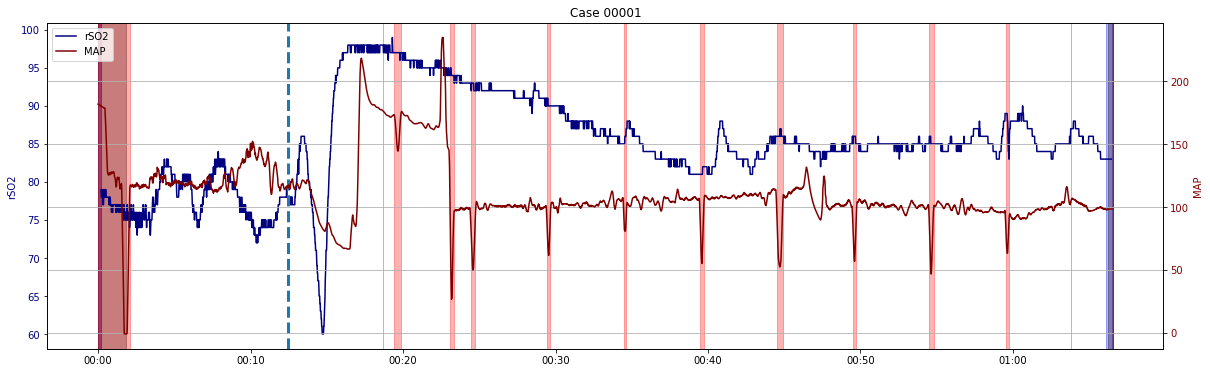

In [10]:
fig, ax1 = plt.subplots(figsize=(20,6))
ax1.set_ylabel('rSO2', color='navy')
line1 = ax1.plot(df.index, df['rSO2'], color='navy', label='rSO2')
ax1.tick_params(axis='y', labelcolor='navy')
ax2 = ax1.twinx()
ax2.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M'))
ax2.set_ylabel('MAP', color='maroon')
line2 = ax2.plot(df.index, df['MAP'], color='maroon', label='MAP')
ax2.tick_params(axis='y', labelcolor='maroon')
lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper left')
ax2.grid()
plt.title(f'Case {case_str}')
for r in nirs_auto_ranges:
    ax1.axvspan(r[0], r[1], alpha=0.3, color='blue')
for r in nirs_man_ranges:
    ax1.axvspan(r[0], r[1], alpha=0.3, color='purple')
for r in map_auto_ranges:
    ax1.axvspan(r[0], r[1], alpha=0.3, color='black')
for r in map_man_ranges:
    ax1.axvspan(r[0], r[1], alpha=0.3, color='red')
ax1.axvline(mark_timestamp, linestyle='--', linewidth=3)
plt.autoscale(enable=True, axis="x", tight=True)
plt.savefig(f'reports/images/3_{case_str}_01.png', bbox_inches='tight', pad_inches=0.1)
plt.show()